In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats.mstats as mstats
from datetime import timedelta
import datetime
import time
%matplotlib inline
from pymongo import MongoClient
click_data_db = MongoClient().elect2016.google_news_click_data
view_data_db = MongoClient().elect2016.google_news_view_data

In [7]:
predate = "20160423"
postdate = "20160508"


In [8]:
def get_count(predate,postdate,db):
    return db.find({"timestamp": 
                          { "$gt": time.mktime(datetime.datetime.strptime(predate,"%Y%m%d").timetuple())*1000, 
                           "$lt" : time.mktime(datetime.datetime.strptime(postdate,"%Y%m%d").timetuple())*1000}}).count()

In [9]:
def get_count_list(date_list,db):
    return [[date.strftime("%Y%m%d"),get_count(date.strftime("%Y%m%d"),(date+timedelta(days=1)).strftime("%Y%m%d"),db)] for date in date_list]

In [22]:
daterange = [datetime.date.today()-timedelta(days=i) for i in range(2,40)]

In [23]:
view = np.array(get_count_list(daterange,view_data_db))

In [24]:
click = np.array(get_count_list(daterange,click_data_db))

In [54]:
view

array([['20160516', '27866'],
       ['20160515', '29464'],
       ['20160514', '31824'],
       ['20160513', '29650'],
       ['20160512', '28174'],
       ['20160511', '29858'],
       ['20160510', '33865'],
       ['20160509', '30729'],
       ['20160508', '31372'],
       ['20160507', '33297'],
       ['20160506', '36912'],
       ['20160505', '43282'],
       ['20160504', '30628'],
       ['20160503', '30852'],
       ['20160502', '31090'],
       ['20160501', '32702'],
       ['20160430', '34186'],
       ['20160429', '33224'],
       ['20160428', '34144'],
       ['20160427', '34224'],
       ['20160426', '34937'],
       ['20160425', '34810'],
       ['20160424', '38199'],
       ['20160423', '34096'],
       ['20160422', '43574'],
       ['20160421', '47317'],
       ['20160420', '32094'],
       ['20160419', '2694'],
       ['20160418', '1667'],
       ['20160417', '1685'],
       ['20160416', '1508'],
       ['20160415', '1067'],
       ['20160414', '1112'],
       ['2016041

In [26]:
click

array([['20160516', '219'],
       ['20160515', '169'],
       ['20160514', '253'],
       ['20160513', '208'],
       ['20160512', '241'],
       ['20160511', '257'],
       ['20160510', '268'],
       ['20160509', '181'],
       ['20160508', '226'],
       ['20160507', '230'],
       ['20160506', '293'],
       ['20160505', '388'],
       ['20160504', '234'],
       ['20160503', '232'],
       ['20160502', '207'],
       ['20160501', '218'],
       ['20160430', '203'],
       ['20160429', '193'],
       ['20160428', '221'],
       ['20160427', '203'],
       ['20160426', '213'],
       ['20160425', '248'],
       ['20160424', '242'],
       ['20160423', '231'],
       ['20160422', '298'],
       ['20160421', '276'],
       ['20160420', '180'],
       ['20160419', '5'],
       ['20160418', '0'],
       ['20160417', '0'],
       ['20160416', '0'],
       ['20160415', '1'],
       ['20160414', '0'],
       ['20160413', '0'],
       ['20160412', '1'],
       ['20160411', '0'],
       ['2

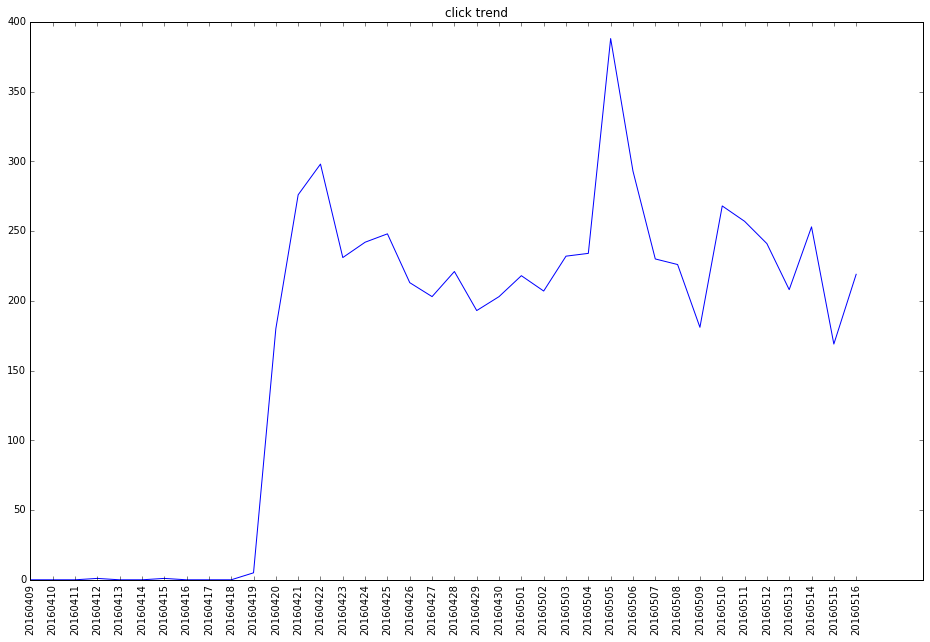

In [55]:
x = range(len(click))
y = click[:,1][::-1]
xlabels = click[:,0][::-1]
plt.figure(figsize=(16,10))
plt.plot(x,y)
plt.xticks(x,xlabels,rotation=90)
plt.title("click trend")
plt.show()

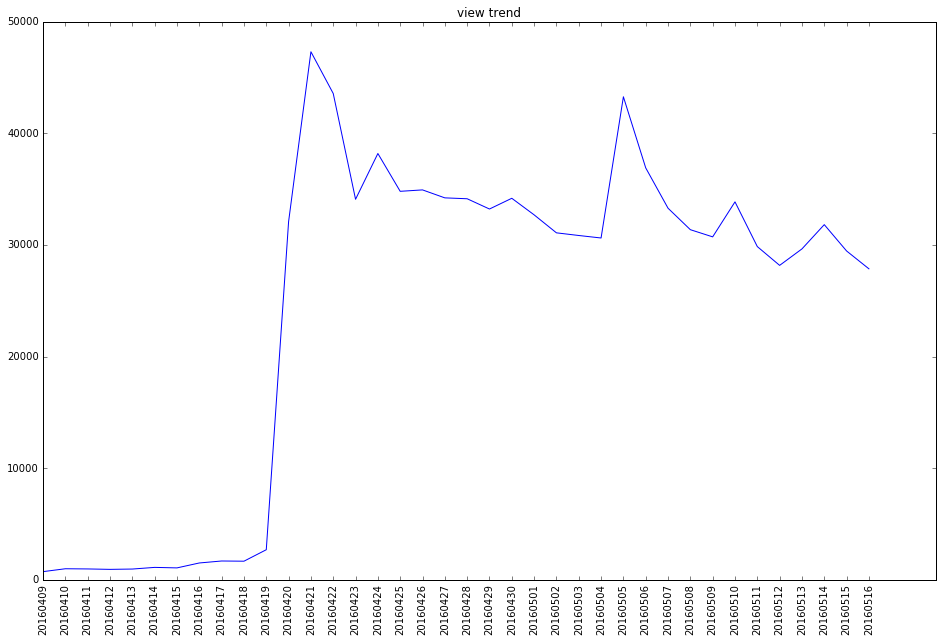

In [56]:
x = range(len(view))
y = view[:,1][::-1]
xlabels = view[:,0][::-1]
plt.figure(figsize=(16,10))
plt.plot(x,y)
plt.xticks(x,xlabels,rotation=90)
plt.title("view trend")
plt.show()

In [59]:
a = click_data_db.find().limit(3)
for i in a:
    print a.